## E commerce data/ RFM analysis

### 0. Introduction and data dictionary
* This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 
  for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. 
  Many customers of the company are wholesalers.

##### Data Dictionary
* Invoice no: invoice number, a 6 digit integral unique number assigned to each transaction, if it starts with a "c", indicates a cancellation
* StockCode: Product code, a 5 digit integet uniquely assigned to each distinct product
* Description: Product name, Nominal
* Quantity: The quantities of each prodyuct per transaction (Numeric)
* InvoiceDate: Invoice Date and time, (Numeric)
* UnitPrice: Prodict price per unit in Sterling(Pounds)
* CustomerID: Customer number, 5 digit nominal unique udentifier assigned to each customer
* Country: Country name, (Nominal), the name of the country where each customer resides

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams.update(
    {"font.size": 11, "figure.facecolor": "w", "axes.facecolor": "w", "axes.spines.right": False,"axes.spines.top": False, "axes.spines.bottom": False,
        "xtick.top": False,
        "xtick.bottom": False,
        "ytick.right": False,
        "ytick.left": False,
    }
)

plt.rcParams['figure.figsize'] = (12, 4)


import warnings
warnings.filterwarnings('ignore')

### 1.Importing libraries

In [18]:
df= pd.read_csv("data-2.csv", encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
df.shape

(541909, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [21]:
#Looking at numerical columns descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 2.1 Check for duplicates

In [22]:

df.duplicated().sum()

5268

In [23]:
### There are 5268 rows duplicated

In [24]:
#Drop duplicates
df= df.drop_duplicates()

df.duplicated().sum()

0

### 2.2 Missing values

In [25]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [27]:
for col in df.columns:
    pct_missing= df[col].isnull().mean()
    print(f'{col}- {pct_missing :.1%}')

InvoiceNo- 0.0%
StockCode- 0.0%
Description- 0.3%
Quantity- 0.0%
InvoiceDate- 0.0%
UnitPrice- 0.0%
CustomerID- 25.2%
Country- 0.0%


In [28]:
## It is evident that there are missing values in customer_ID and Description
##Lets create a new dataframe without null values for rfm analysis

In [29]:
copy= df.copy()

#Dealing with missing values in our main data
df["Description"]=df["Description"].fillna("Unknown")
df["CustomerID"]= df["CustomerID"].fillna(0)

In [30]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 2.3 Data Types

In [31]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [33]:
# Convert InvoiceDate to datetime, and CustomerID should be integer
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])
df["CustomerID"]= df["CustomerID"].astype("int64")

### 2.4 Structuring

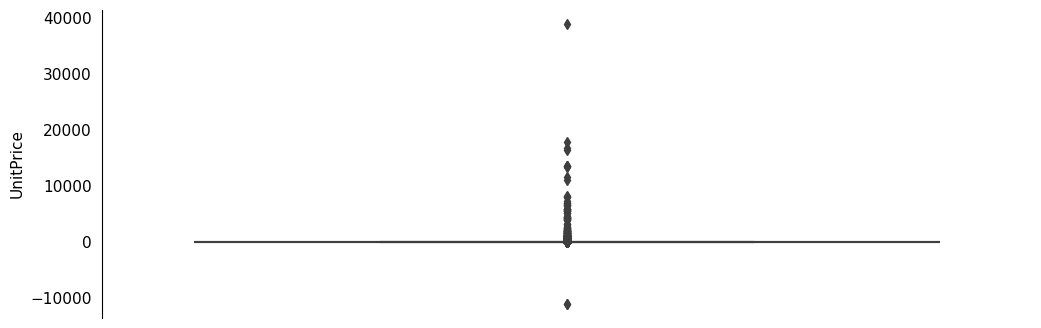

In [34]:
#Checking Unit Price Distribution
sns.boxplot(y="UnitPrice", data= df);

In [35]:
## We observe there are negative values for unit price

In [36]:
df[df["UnitPrice"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0,United Kingdom


In [37]:
#These are debt values so we wont need them

#Filtering them out

df= df[df["UnitPrice"]>0]

In [38]:
#Now check the minimum value of UNitPrice column

df["UnitPrice"].min()

0.001

In [41]:
#We will make a column for cehckout price
df["Checkout_Price"]= df["Quantity"]* df["UnitPrice"]

In [39]:
#Now we can make separate columns for Year anad Month for tme series analysis
df["Year"]= df["InvoiceDate"].dt.year
df["YearMonth"]= df["InvoiceDate"].dt.to_period("M")
df["YearMonth"]= df["YearMonth"].astype("str")


In [40]:
df["YearMonth"]

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: YearMonth, Length: 534129, dtype: object

In [42]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,YearMonth,Checkout_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,2010-12,20.34


In [43]:
# There are cancelled transactions, so we will make a df for it
cancelled= df[df["InvoiceNo"].str.contains("C")]
df=df[~df["InvoiceNo"].str.contains("C", na= False)]

In [44]:
# The data has no cancelled puchases now
#We will make colu,mn forcustomer type if they are Members or Normal customers

In [45]:
df.loc[df["CustomerID"]==0, "CustomerType"]='Normal'
df.loc[df["CustomerID"]>0,'CustomerType']="Member"

## 3.Analysis

### 3.1 EDA

##### Q1.Which products have been sold by highest quantity

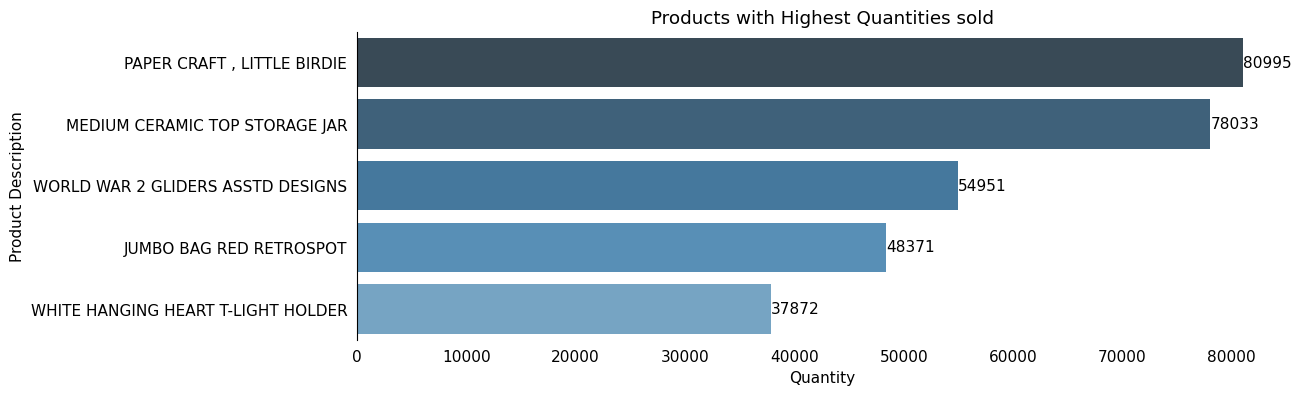

In [50]:
#Grouping products by Quantitty
product_quantity= df.groupby("Description").agg({"Quantity":"sum"}).sort_values(by="Quantity", ascending=False).reset_index(drop=False).head(5)

#Choosing palette and reversing it
Palette= sns.color_palette("Blues_d")
Palette.reverse()



ax= sns.barplot(y="Description", x="Quantity", data=product_quantity, palette= Palette)

ax.bar_label(ax.containers[0]);

plt.title("Products with Highest Quantities sold")
plt.ylabel("Product Description");


* So we can see that "paper craft, little birdie" has been sold the the most estimated quantity of 80995 pieces

#### Q2. Which product has achieved the highest sales


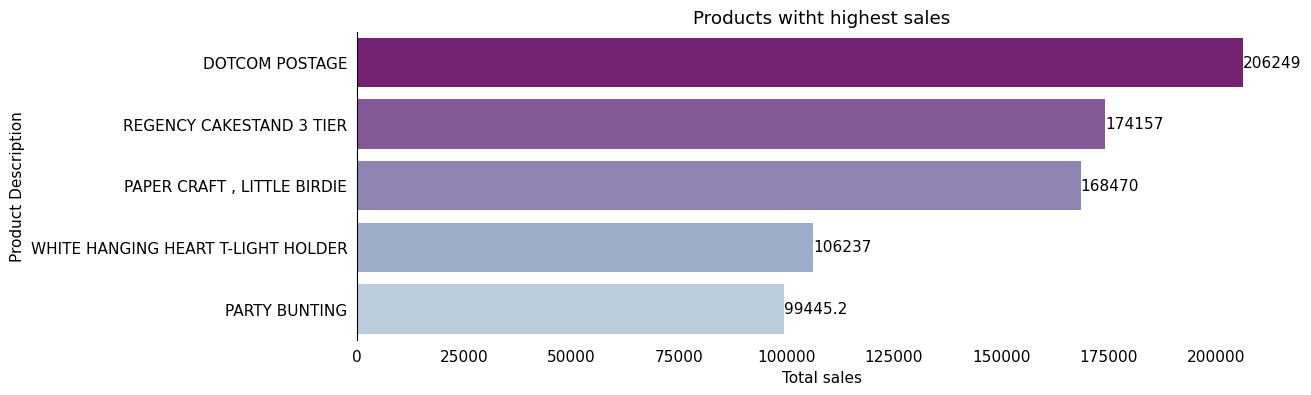

In [52]:
product_sales= df.groupby("Description").agg({"Checkout_Price":"sum"}).sort_values(by="Checkout_Price",ascending= False).reset_index(drop=False).head(5)

#Choosing Palette and reversing it
p= sns.color_palette("BuPu")
p.reverse()

ax= sns.barplot(y="Description", x="Checkout_Price", data= product_sales, palette=p)
ax.bar_label(ax.containers[0])

#Setting title
plt.title("Products witht highest sales")
plt.xlabel("Total sales")
plt.ylabel("Product Description");

#### Q3. In which country do we have more customers

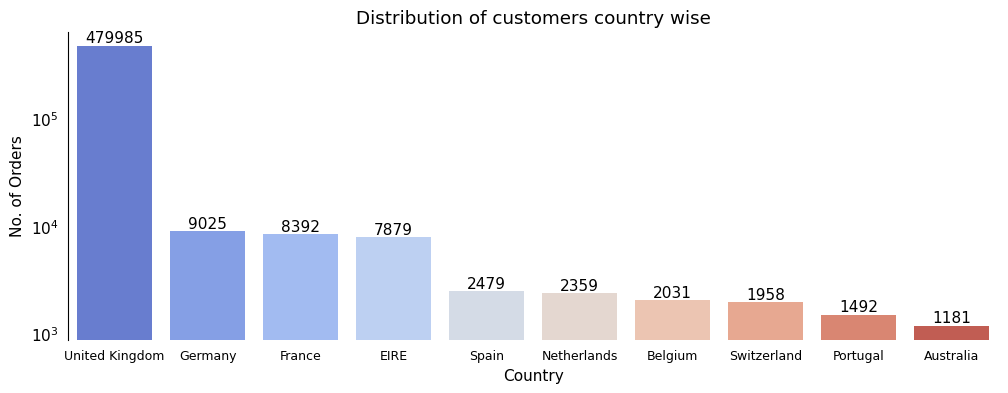

In [56]:
#Counting countries
country= df["Country"].value_counts().reset_index(drop=False).head(10)
country.columns=["Country", "Counts"]


#Visualizing data
ax= sns.barplot(y="Counts", x="Country", data= country, palette="coolwarm")

#Data labels
ax.bar_label(ax.containers[0])

#Setting title
plt.title("Distribution of customers country wise")
plt.xlabel("Country")
plt.ylabel("No. of Orders")
plt.xticks(fontsize=9)
plt.yscale("log");

* We can seee most of our customers are from UK with significant difference from other countries
* We notices that 9 of 10 are in Europe

#### Q4, Which month have we gained the highest sales?

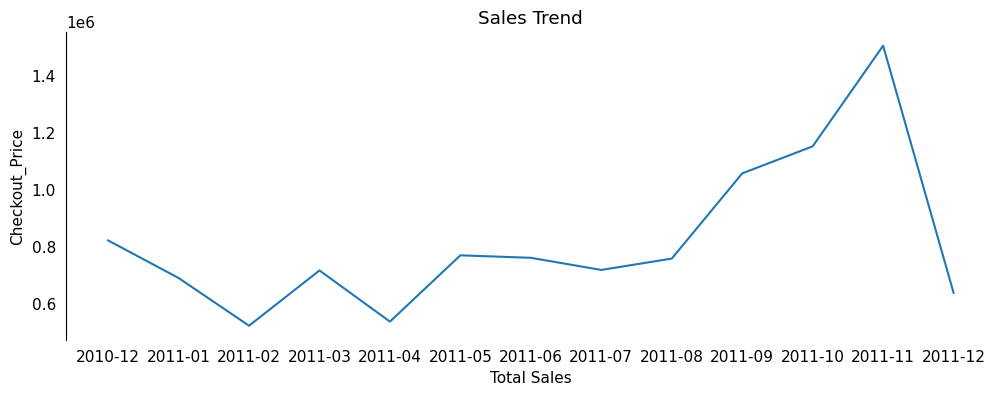

In [58]:
#Grouping montha and monthYear by checkout price
month_sales= df.groupby("YearMonth")["Checkout_Price"].sum().reset_index(drop=False)

month_sales
#Visualizing time series data
sns.lineplot(x="YearMonth", y="Checkout_Price", data= month_sales)
plt.title("Sales Trend")
plt.xlabel("Total Sales");

* The largest sales happened in Novemeber 2011

#### Q5. What is the distribution of custoemr type


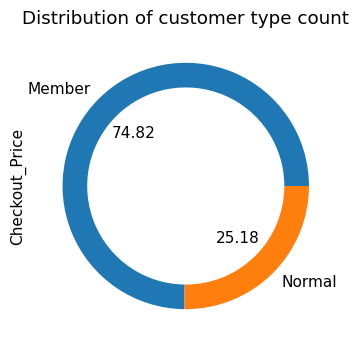

In [60]:
#making the pie chart for customer type distribution
df.groupby("CustomerType").count()["Checkout_Price"].plot(kind="pie", autopct="%.2f", subplots=True, wedgeprops=dict(width=0.20))
plt.title("Distribution of customer type count");

* Almost 75% of purchases were made by member customers

#### Q6. Which customer type has higher average sales?

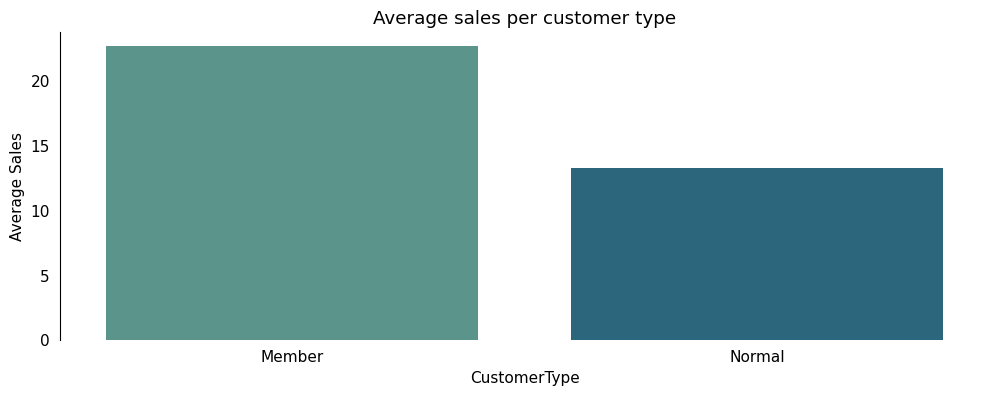

In [63]:
# Gruping customer type by average sales
customer_sales= df.groupby("CustomerType")["Checkout_Price"].mean().reset_index(drop=False)  #Same queries 

sns.barplot(x="CustomerType", y="Checkout_Price", data= customer_sales, palette="crest")

#Setting title
plt.title("Average sales per customer type")
plt.ylabel("Average Sales");

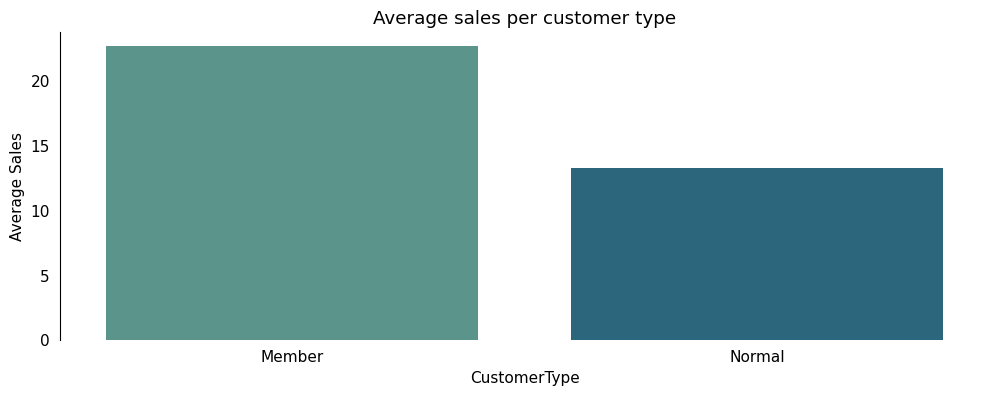

In [65]:
#Same query as above just a diferent waay of writing the code
customer_sales1= df.groupby("CustomerType").agg({"Checkout_Price":"mean"}).reset_index(drop= False)  

sns.barplot(x="CustomerType", y="Checkout_Price", data= customer_sales1, palette="crest")

#Setting title
plt.title("Average sales per customer type")
plt.ylabel("Average Sales");

* Member customers have higher average sales than normal customers

## 3.3 RFM Analysis

The RFM is employed as an algorithm as it is a simple model

The word RFM derived from three acronyms: Recency, Frequenxy, Monetary; and seeks to better understand the client by 
verifying when his last purchase was; how many times he has purchased, and how much he has spent with the company

Recency(R) Dys since the customers last purchase; Frequency(F) Number of Products bought by the customer; Monetary
(M) Total spent on purchases

Customer Score:
    
The customer score ranges from 1 to 5, where the higher this number the better. This score is assigned for each 
acronym independantly:

* The more recent the customers purchase the higher the recency(R) score
* The more number of purchases the customer makes, the higher the Frequency score(F)
* The more the customer spends on purchases, the higher the score the customer will have Monetary(M)

This definition of each score can be goven through inference .i.e. some busines definition or by quantile


In [72]:
# Ignoring cancel orders
copy[~copy["InvoiceNo"].str.contains("C", na=False)]
     
#Dropping null values in customer ID  column
copy.dropna(subset=["CustomerID"], inplace=True)

#Make checkoutprice column
copy["CheckoutPrice"]= copy["UnitPrice"] * copy["Quantity"]
     
#Ignoring debts
copy= copy[copy["UnitPrice"]>0]
     
#Dealing with datatypes
copy["InvoiceDate"]= pd.to_datetime(copy["InvoiceDate"])
copy["CustomerID"]= copy["CustomerID"].astype('int64')

In [79]:
#Define today
today_date= copy["InvoiceDate"].max()


Timestamp('2011-12-09 12:50:00')

In [75]:
copy.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [78]:
#Set our data to rfm analysis
rfm= copy.groupby("CustomerID").agg({"InvoiceDate": lambda date: (today_date - date.max()).days,"InvoiceNo": lambda num
                                    :num.nunique(),"CheckoutPrice":lambda CheckoutPrice: CheckoutPrice.sum()})

rfm

,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
12346,325,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,3,176.60


In [80]:
#Renaming columns
rfm.columns=["Recency", "Frequency","Monetary"]

In [81]:
#Ignore case where MOnetary< 0 we will ot need that in our analysis
rfm= rfm[rfm["Monetary"]>0]

In [82]:
#Set recency score 
rfm["Recency_Score"]= pd.qcut(rfm["Recency"],5, labels=[5,4,3,2,1] )

In [84]:
#Set frequency score
rfm["Frequency_Score"]= pd.qcut(rfm["Frequency"].rank(method='first'),5, labels=[1,2,3,4,5])

In [85]:
#Set Monetary Score
rfm["Monetary_Score"]= pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

In [86]:
#Set RFM Score
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['Monetary_Score'].astype(str) )

In [88]:
rfm[["Recency_Score","Frequency_Score","Monetary_Score","RFM_Score"]]

,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,
12347,5,4,5,545
12348,2,3,4,234
12349,4,1,4,414
12350,1,1,2,112
12352,3,5,4,354
...,...,...,...,...
18280,1,2,1,121
18281,1,2,1,121
18282,5,3,1,531


In [90]:
#Our customer segmentation map

seg_map={
    r'[1-2][1-2][1-5]':"Hiberanating",
    r'[1-2][3-4][1-5]':"At risk",
    r'[1-2]5[1-5]':"Cannot lose them",
    r'3[1-2][1-5]':"About to sleep",
    r'33[1-5]':"Need attention",
    r'[3-4][4-5][1-5]':"Loyal Customers",
    r'[4-5][1-3][1-5]':"Good Potential",
    r'5[4-5][1-5]':"Champions"
}

rfm["Segment"]= rfm["RFM_Score"].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12347,1,7,4310.00,5,4,5,545,Champions
12348,74,4,1797.24,2,3,4,234,At risk
12349,18,1,1757.55,4,1,4,414,Good Potential
12350,309,1,334.40,1,1,2,112,Hiberanating
12352,35,11,1545.41,3,5,4,354,Loyal Customers


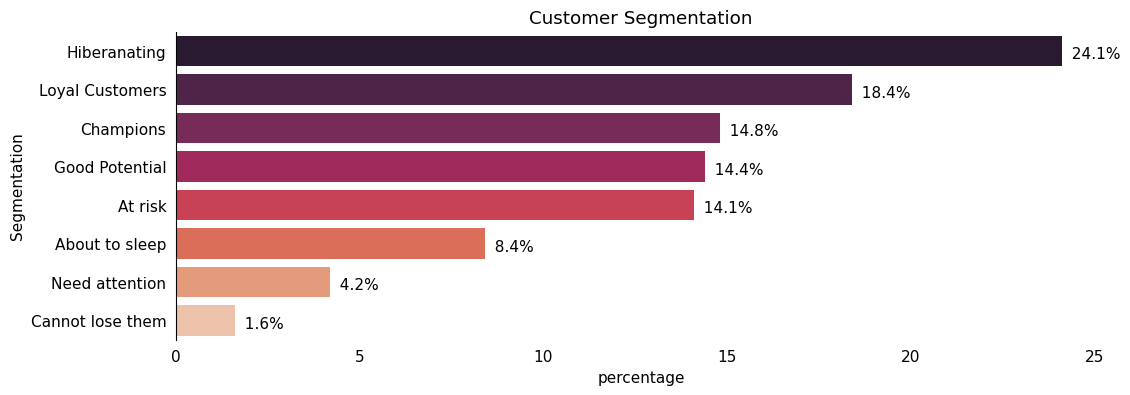

In [167]:
#Bar Plot for Our segments
Segments = (rfm['Segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
Segments = Segments.round(1)
b =sns.barplot(y='index',x='percentage', data=Segments, palette = 'rocket')
for i, v in enumerate(Segments['percentage']):
    b.text(v,i+0.20,"  {:.1f}".format(v)+"%", color='black', ha="left")
    b.set_ylabel('Segmentation')
    b.set_title('Customer Segmentation')

## 4.Conclusions

In [ ]:
#### 4.1 Findings

* "paper craft","Little Birdie" product is the most sold product
* "DOTCOM POSTAGE" has achieved the highest sales
* Most of Our customers are living in UK with very big differnce from the other countries
* The best sales was in November 2011
* 75% of purchases were made by member customers
* Member Customers have higher average sales than Normal Customers
* 24.1% of our customers are in the hibernation segment and that for customers who have purchased from us a few times and the last time was a long time
* 18.4% of our customers are loyal and usually buys from us
* 14.8% of our customers are champions so we are their favourtie market
* 14.4% of our customers have good potential that refers to customers who have bought from us recently and have not buy many times
* 14.1% of our cutomeers are at risk segment so we must attract them again
* 8.4% of our customers are about to sleep and this segment of customers who last purchase from us for a fairly long time
* 4.2% of our customers are needing more attention to make them fall under Champions segment
*1.6% of our customers can`t lost them and they purchased from us many times but last time was for a long time

#### 4.2 Recommendations

**EDA Recommendations:**
* You should restrict your market to Europe
* The benefits of using member cards should be conveyed to the normal customers which will convert them to a member     which means more sales and customer loyalty
    
**RFM Analysis Recommedations:**
* 24.1% - Hibernating :
1. Reviving interest with outreach campaigns
* 18.4% - Loyal Customers:
1. Personalized communication

2. Avoid mass mailing of offers

3. Offer few products, but present products that they are likely to be interested in

4. Ask for product reviews

* 14.8% - Champions:
1. Special offers, products and discounts for these customers so they feel valued
2. Ask for reviews and feedbacks constantly
3. Avoid sending massive amounts of offers
4. Personalized communication
5. Give rewards

* 14.4% - Good Potential:
1. Offer a loyalty program

2. Keep them engaged

3. Personalized and other product recommendations

* 14.1% - At Risk:
1. Send personalized communications and other messages to reconnect

2. Offer good deals

* 8.4% - About to sleep :
1. Make them feel confident in us
2. Offer them good deals on their favortie products

* 4.2% - Need Attetion:
1. Promotional campaigns for a limited time

2. Product recommendations based on their behavior

3. Show the importance of buying with the company

* 1.6% - Cannot lost them:
1. Standard communication for sending offers
2. Offer relevant products and good deals
3. Ask them if there was a problem in their last purchases
